In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [2]:
# Load the combined dataframe from previous step
# (If needed, you can save & reload it)

import pandas as pd

combined_df = pd.read_pickle("combined_df.pkl")


print(combined_df.shape)
combined_df.head()


(1458152, 22)


,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,...,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z,subject_id,activity
0,2021-01-01 11:47:09.445505,19722,0,79526,78424,4406,85630,99618,6438,6584384,...,34.69,34.005062,2.830689,-4.158342,-8.117356,0.821122,-0.478228,-0.710201,s12,run
1,2021-01-01 11:47:09.447505,19817,0,79527,78417,4407,85630,99618,6438,6584384,...,34.69,34.011051,2.806746,-4.148765,-8.157461,0.816329,-0.478495,-0.710867,s12,run
2,2021-01-01 11:47:09.449505,19976,0,79518,78398,4405,85626,99619,6442,6584384,...,34.69,34.014046,2.782204,-4.130807,-8.189186,0.814597,-0.476764,-0.711932,s12,run
3,2021-01-01 11:47:09.451505,20136,0,79527,78410,4418,85627,99627,6444,6584384,...,34.69,34.002068,2.760655,-4.116441,-8.216721,0.815396,-0.474367,-0.713663,s12,run
4,2021-01-01 11:47:09.453505,20218,0,79527,78410,4418,85623,99610,6441,6584384,...,34.69,33.993080,2.731325,-4.113448,-8.253833,0.818193,-0.471038,-0.715261,s12,run


In [3]:
biomed_df = combined_df[
    ["time", "pleth_1", "pleth_2", "pleth_3", "ecg", "peaks", "subject_id", "activity"]
].copy()

biomed_df.head()


,time,pleth_1,pleth_2,pleth_3,ecg,peaks,subject_id,activity
0,2021-01-01 11:47:09.445505,79526,78424,4406,19722,0,s12,run
1,2021-01-01 11:47:09.447505,79527,78417,4407,19817,0,s12,run
2,2021-01-01 11:47:09.449505,79518,78398,4405,19976,0,s12,run
3,2021-01-01 11:47:09.451505,79527,78410,4418,20136,0,s12,run
4,2021-01-01 11:47:09.453505,79527,78410,4418,20218,0,s12,run


In [4]:
biomed_df.shape

(1458152, 8)

In [5]:
biomed_df.isnull().sum()


time          0
pleth_1       0
pleth_2       0
pleth_3       0
ecg           0
peaks         0
subject_id    0
activity      0
dtype: int64

In [6]:
#linear interpolation
biomed_df.interpolate(method="linear", inplace=True)
biomed_df.dropna(inplace=True)

print("After cleaning:", biomed_df.shape)


C:\Users\n\AppData\Local\Temp\ipykernel_15916\3604957285.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  biomed_df.interpolate(method="linear", inplace=True)


After cleaning: (1458152, 8)


In [7]:
FS = 500  # sampling frequency in Hz


In [8]:
#bandpass filter (for heart related frequencies only)
# heart frequency range : 0.5 – 4 Hz  (30–240 BPM)

def bandpass_filter(signal, lowcut=0.5, highcut=4, fs=500, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)



In [9]:
print("Unique subject_id values:")
print(combined_df["subject_id"].unique())

print("\nUnique activity values:")
print(combined_df["activity"].unique())


Unique subject_id values:
['s12' 's22']

Unique activity values:
['run' 'sit' 'walk']


In [10]:
# Choose ONE subject and ONE activity
subject_example = "s12"
activity_example = "walk"

subset = combined_df[
    (combined_df["subject_id"] == subject_example) &
    (combined_df["activity"] == activity_example)
].copy()

print(subset.shape)
subset.head()



(242888, 22)


,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,...,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z,subject_id,activity
485296,2021-01-01 11:36:49.402149,33144,0,75614,67890,3799,78859,87689,4501,6154544,...,34.38,33.525833,9.327686,-2.105808,4.976003,-0.177845,-0.695945,-0.047464,s12,walk
485297,2021-01-01 11:36:49.404149,33755,0,75610,67868,3810,78863,87702,4504,6154544,...,34.38,33.534821,9.315715,-2.111794,4.976003,-0.154275,-0.691018,-0.027090,s12,walk
485298,2021-01-01 11:36:49.406149,34322,0,75608,67887,3804,78864,87701,4498,6154544,...,34.38,33.537815,9.304940,-2.117181,4.971215,-0.131904,-0.685026,-0.005918,s12,walk
485299,2021-01-01 11:36:49.408149,34833,0,75608,67887,3804,78865,87692,4496,6154544,...,34.38,33.534821,9.291173,-2.135138,4.977799,-0.110865,-0.678501,0.015255,s12,walk
485300,2021-01-01 11:36:49.410149,35287,0,75612,67883,3799,78869,87697,4499,6154631,...,34.38,33.534821,9.287581,-2.142920,4.986179,-0.090492,-0.672775,0.036161,s12,walk


In [11]:
subset["pleth_3_filt"] = bandpass_filter(
    subset["pleth_3"].values,
    fs=FS
)


In [12]:
subset["pleth_1_filt"] = bandpass_filter(
    subset["pleth_1"].values,
    fs=FS
)

subset["pleth_2_filt"] = bandpass_filter(
    subset["pleth_2"].values,
    fs=FS
)


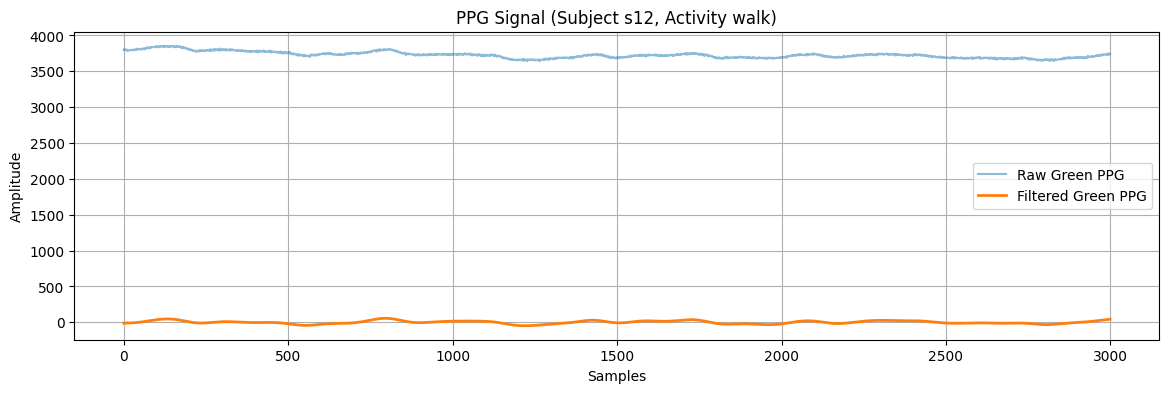

In [13]:
plt.figure(figsize=(14, 4))

samples = slice(0, 3000)  # ~6 seconds

plt.plot(subset["pleth_3"].values[samples], label="Raw Green PPG", alpha=0.5)
plt.plot(subset["pleth_3_filt"].values[samples], label="Filtered Green PPG", linewidth=2)

plt.title(f"PPG Signal (Subject {subject_example}, Activity {activity_example})")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# ================================
# FAST & CORRECT BIOMED FILTERING
# ================================

filtered_groups = []

# Group data by subject and activity (each = one continuous recording)
for (subject, activity), group in combined_df.groupby(["subject_id", "activity"]):

    # Always sort by time before filtering
    group = group.sort_values("time").copy()

    # Apply bandpass filters on NumPy arrays (FAST)
    group["pleth_3_filt"] = bandpass_filter(
        group["pleth_3"].values,
        fs=FS
    )

    group["pleth_1_filt"] = bandpass_filter(
        group["pleth_1"].values,
        fs=FS
    )

    group["pleth_2_filt"] = bandpass_filter(
        group["pleth_2"].values,
        fs=FS
    )

    filtered_groups.append(group)

# Combine all filtered recordings ONCE (very fast)
combined_df = pd.concat(filtered_groups, ignore_index=True)


print("✅ Bandpass filtering completed successfully.")
print("Final shape:", combined_df.shape)


✅ Bandpass filtering completed successfully.
Final shape: (1458152, 25)


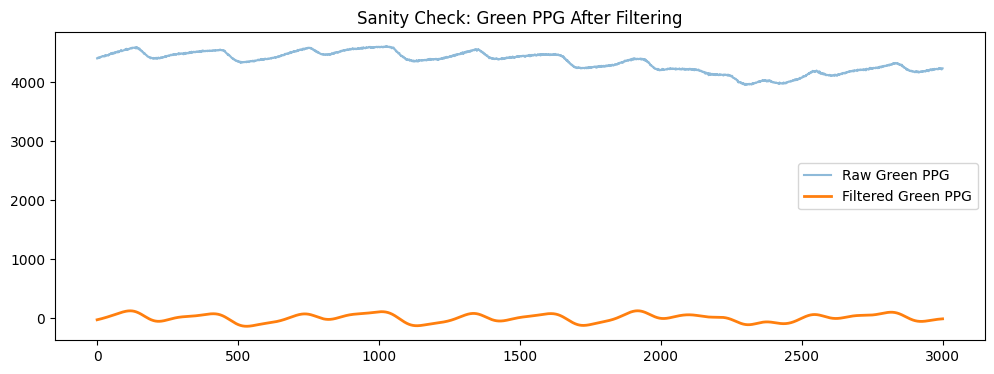

In [15]:
example = combined_df[
    (combined_df["subject_id"] == combined_df["subject_id"].iloc[0]) &
    (combined_df["activity"] == combined_df["activity"].iloc[0])
]

plt.figure(figsize=(12, 4))
plt.plot(example["pleth_3"].values[:3000], label="Raw Green PPG", alpha=0.5)
plt.plot(example["pleth_3_filt"].values[:3000], label="Filtered Green PPG", linewidth=2)
plt.legend()
plt.title("Sanity Check: Green PPG After Filtering")
plt.show()


In [16]:
#PROCESSING ACCELEROMETER SIGNALS:
from scipy.signal import butter, filtfilt

def highpass_filter(signal, cutoff=0.3, fs=500, order=3):
    """
    High-pass filter to remove gravity / low-frequency components from accelerometer.
    cutoff: frequency in Hz (typical 0.3 Hz to remove gravity)
    fs: sampling frequency
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)


In [17]:
ACC_COLUMNS = ["a_x", "a_y", "a_z"]

filtered_acc_groups = []

for (subject, activity), group in combined_df.groupby(["subject_id", "activity"]):
    group = group.sort_values("time").copy()

    for col in ACC_COLUMNS:
        if col in group.columns:
            group[f"{col}_filt"] = highpass_filter(group[col].values, fs=FS)

    filtered_acc_groups.append(group)

# Combine all filtered recordings
combined_df = pd.concat(filtered_acc_groups, ignore_index=True)


In [18]:
# Avoid copies, use numpy arrays, append filtered columns directly
for col in ["pleth_1", "pleth_2", "pleth_3"]:
    combined_df[f"{col}_filt"] = np.nan

for col in ACC_COLUMNS:
    combined_df[f"{col}_filt"] = np.nan

for (subject, activity), group_idx in combined_df.groupby(["subject_id", "activity"]).groups.items():
    idx = list(group_idx)

    # PPG filtering
    for col in ["pleth_1", "pleth_2", "pleth_3"]:
        combined_df.loc[idx, f"{col}_filt"] = bandpass_filter(combined_df.loc[idx, col].values, fs=FS)

    # Accelerometer high-pass filtering
    for col in ACC_COLUMNS:
        combined_df.loc[idx, f"{col}_filt"] = highpass_filter(combined_df.loc[idx, col].values, fs=FS)

print("✅ Filtering completed for PPG and accelerometer (memory-efficient).")


✅ Filtering completed for PPG and accelerometer (memory-efficient).


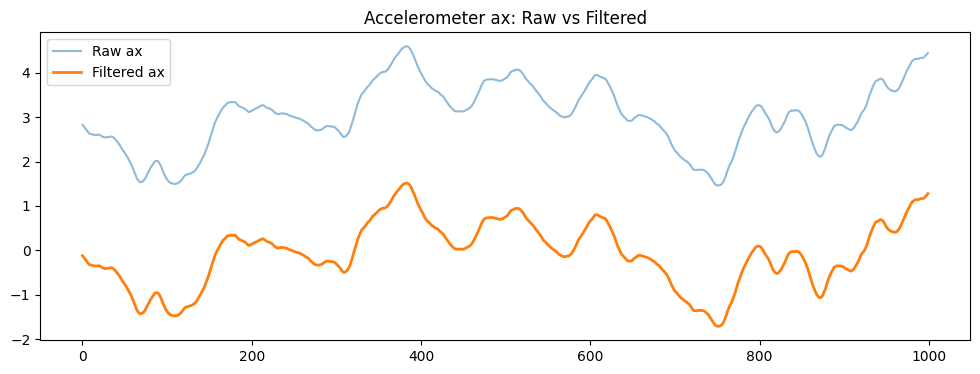

In [19]:
subject_example = combined_df["subject_id"].iloc[0]
activity_example = combined_df["activity"].iloc[0]

example = combined_df[
    (combined_df["subject_id"] == subject_example) &
    (combined_df["activity"] == activity_example)
]

plt.figure(figsize=(12,4))
plt.plot(example["a_x"].values[:1000], label="Raw ax", alpha=0.5)
plt.plot(example["a_x_filt"].values[:1000], label="Filtered ax", linewidth=2)
plt.legend()
plt.title("Accelerometer ax: Raw vs Filtered")
plt.show()


In [20]:
# Save preprocessed biomedical data
OUTPUT_PATH = "../Data/processed/biomedical_preprocessed.csv"

combined_df.to_csv(OUTPUT_PATH, index=False)

print("✅ Preprocessed data saved to:", OUTPUT_PATH)


✅ Preprocessed data saved to: ../Data/processed/biomedical_preprocessed.csv


In [21]:
print(combined_df.columns)

Index(['time', 'ecg', 'peaks', 'pleth_1', 'pleth_2', 'pleth_3', 'pleth_4',
       'pleth_5', 'pleth_6', 'lc_1', 'lc_2', 'temp_1', 'temp_2', 'temp_3',
       'a_x', 'a_y', 'a_z', 'g_x', 'g_y', 'g_z', 'subject_id', 'activity',
       'pleth_3_filt', 'pleth_1_filt', 'pleth_2_filt', 'a_x_filt', 'a_y_filt',
       'a_z_filt'],
      dtype='object')
